In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = {
    'x1':[0,0,1,1],
    'x2':[0,1,0,1],
    'y':[0,1,1,0]
}

In [ ]:
df = pd.DataFrame(data)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


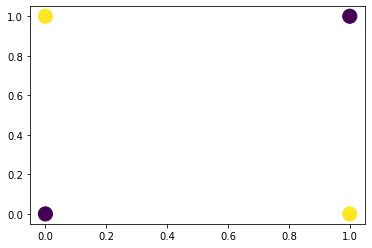

In [ ]:
plt.scatter(x=df['x1'],y=df['x2'],c=df['y'],s=200)
plt.show()

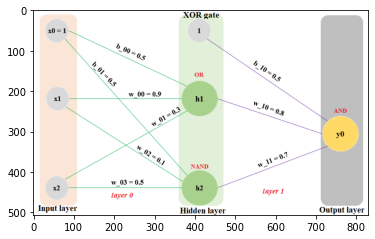

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('xor_img.PNG')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
X=[
    [0,0],
    [0,1],
    [1,0],
    [1,1]
]
y=[0,1,1,0]

In [ ]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

In [ ]:
def gradient(w, w_derivative):
    alpha = .2
    w = w - alpha * w_derivative
    return w

In [ ]:
def perceptron(X,y):
    X=np.insert(X,0,1,axis=1)
    #initializing bias and weights
    #----------------Layer 0------------------------
    b_00 = 0.5          #b_00 means layer 0 bias 0
    b_01 = 0.5          #b_01 means layer 0 bias 1
    w_00 = 0.9          #w_00 means layer 0 weight 0
    w_01 = 0.3          #w_00 means layer 0 weight 1
    w_02 = 0.1
    w_03 = 0.5
    #------------------Layer 1----------------------
    b_10 = 0.5          #b_10 means layer 1 bias 0
    w_10 = 0.8          #w_10 means layer 1 weight 0
    w_11 = 0.7          #w_10 means layer 1 weight 1
    #----------------------------------------
    #setting and initializing ephochs, tolerable error, threshold value
    max_epochs = 10000
    epochs = 0
    agreed_convergence_error = 0.001
    error = 1
    decision_threshold = 0.5
    y_output = []
    #------------------Perceptron Training starts----------------------
    while epochs <= max_epochs and error > agreed_convergence_error:
        epochs += 1
        y_output = []
        for i in range(X.shape[0]):    #X.shape = (4,3)
            #forward propagation
            h0 = sigmoid(w_00*X[i,1]+w_01*X[i,2]+b_00*X[i,0]) #output of the first hidden neuron
            h1 = sigmoid(w_02*X[i,1]+w_03*X[i,2]+b_01*X[i,0]) #output of the second hidden neuron
            y0 = sigmoid(w_10*h0+w_11*h1+b_10*1)   #output of the last neuron
            y_output.append(y0)
            if epochs%10000 == 0:
                print('y0',y0)
                if y0 > decision_threshold:
                    prediction = 1
                else:
                    prediction = 0
                print('real value', y[i])
                print('predicted value', prediction)
            
            #backward propagation
            #layer 0
            der_y0 = y0 - y[i]    #derivative of y0
            der_w_00 = der_y0 * y0 * (1 - y0) * w_10 * h0 * (1 - h0) * X[i,1]
            der_w_01 = der_y0 * y0 * (1 - y0) * w_10 * h0 * (1 - h0) * X[i,2]
            der_b_00 = der_y0 * y0 * (1 - y0) * w_10 * h0 * (1 - h0) * X[i,0]
            
            der_w_02 = der_y0 * y0 * (1 - y0) * w_11 * h1 * (1 - h1) * X[i,1]
            der_w_03 = der_y0 * y0 * (1 - y0) * w_11 * h1 * (1 - h1) * X[i,2]
            der_b_01 = der_y0 * y0 * (1 - y0) * w_11 * h1 * (1 - h1) * X[i,0]
            
            #layer 1
            der_w_10 = der_y0 * y0 * (1 - y0) * h0
            der_w_11 = der_y0 * y0 * (1 - y0) * h1
            der_b_10 = der_y0 * y0 * (1 - y0) * 1
            
            #updating weights
            #layer 0
            w_00 = gradient(w_00, der_w_00)
            w_01 = gradient(w_01, der_w_01)
            w_02 = gradient(w_02, der_w_02)
            w_03 = gradient(w_03, der_w_03)
            b_00 = gradient(b_00, der_b_00)
            b_01 = gradient(b_01, der_b_01)
            
            #layer 1
            w_10 = gradient(w_10, der_w_10)
            w_11 = gradient(w_11, der_w_11)
            b_10 = gradient(b_10, der_b_10)
            
            
            
    e = 0
    for i in range (4):
        e = e + .5 * (y[i]- y_output[i])**2
    print('after training total loss: ',e)
    
    return b_00, w_00, w_01, b_01, w_02, w_03
    

In [ ]:
b_00, w_00, w_01, b_01, w_02, w_03 = perceptron(X,y)

y0 0.03409635573686638
real value 0
predicted value 0
y0 0.9698633002934383
real value 1
predicted value 1
y0 0.9698402636514822
real value 1
predicted value 1
y0 0.031723600721309066
real value 0
predicted value 0
after training total loss:  0.001993097654117095


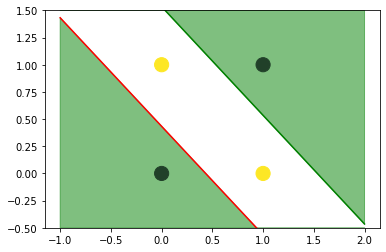

In [ ]:
m=-(w_00/w_01)
b=-(b_00/w_01)
x_line=np.linspace(-1,2,10)
y_line=m*x_line+b
plt.scatter(x=df['x1'],y=df['x2'],c=df['y'],s=200)
plt.plot(x_line,y_line,color='red')
plt.fill_between(x_line, -0.5, y_line, color='green', alpha=.5)


m1=-(w_02/w_03)
b1=-(b_01/w_03)
y_line1=m1*x_line+b1
plt.plot(x_line,y_line1,color='green')
plt.fill_between(x_line, 1.5, y_line1, color='green', alpha=.5)
plt.ylim(-0.5,1.5)
plt.show()

In [ ]:
# you can follow this link also
# https://stackoverflow.com/questions/59399842/xor-gate-with-backpropagation